In [12]:
# Import all the required Packages
# All of them are part of SciPy.org
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as op 
import seaborn as sns
from matplotlib import cm as cm # cm stands for colormap

In [2]:
# Read data from file 'wsbc.data.csv' 
# and create a pandas DataFrame containing the WDBC data.

df = pd.read_csv("wdbc.data.csv")

In [5]:
df.head()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension,...,W_Texture,W_Perimeter,W_Area,W_Smoothness,W_Compactness,W_Concavity,W_Concave_points,W_Symmetry,W_fractal_dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


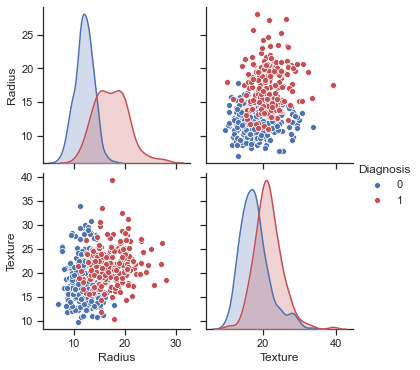

In [10]:
# Make a dataframe for making a pairplot, filter variables radius and texture 
df_pairplot = df[["Radius","Texture","Diagnosis"]]
# make a sns (seaborn) object
sns.set(style="ticks", color_codes=True)
# draw pairplot on object with diagnosis in colors blue and red 
g = sns.pairplot(df_pairplot, palette = ('b', 'r'), hue="Diagnosis", height=2.5)
# show plot
plt.show()

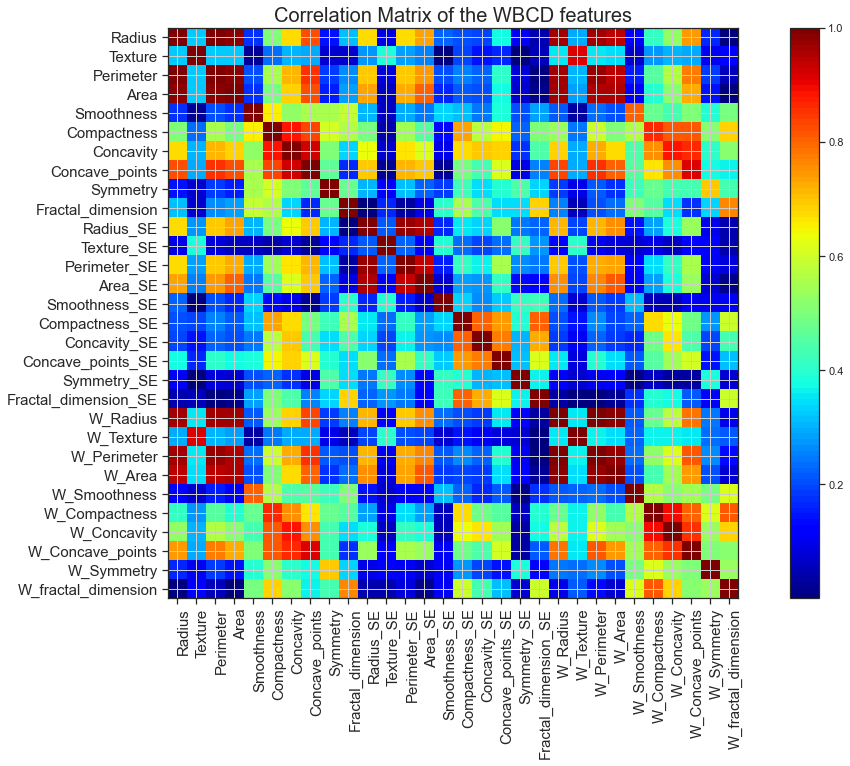

In [11]:
# Bivariate Analysis
# Make a Features Correlation Matrix of the WBCD features
# Readapted from AN6U5

def features_correlation_matrix(df):
    # create matplotlib plot object
    fig = plt.figure() 
    # size object
    fig.set_size_inches(18.5, 10.5) 
    # number of row = 1, number of columns = 1, subplot order = 1
    ax1 = fig.add_subplot(111)  
    # adjust the color map to jet colormap and 100 different color 
    # shades, also see (https://towardsdatascience.com/creating-colormaps-in-matplotlib-4d4de78a04b8)
    cmap = cm.get_cmap('jet', 100) 
    # interpolation='nearest' displays an image without 
    # trying to interpolate between pixels if the display 
    # resolution is not the same as the image resolution
    # The correlation is returned in absolute values:
    cax = ax1.imshow(df.corr().abs(), interpolation="nearest", \
                     cmap=cmap)
    # show grid lines on axis
    ax1.grid(True)
    # define title with fontsize
    plt.title('Correlation Matrix of the WBCD features',fontsize=20)
    # create labels variable with the names of the columns
    labels=list(df.columns)
    # set ticks on the axes
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    # set fontsize and alignment of axis x and y
    ax1.set_xticklabels(labels,fontsize=15,\
              horizontalalignment="left", rotation='vertical')
    ax1.set_yticklabels(labels,fontsize=15)
    
    # Add a colorbar
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, \
                             0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


# Drop the Outcome column from Df and copy it into df_features
df_features = df.drop(df.columns[-1],axis=1)
# Run the correlation_matrix function, using df_features as argument
features_correlation_matrix(df_features)

In [14]:
# Dropping of features with a correlation greater than 0.9. Code readapted from Chris Albon

# Create the correlation matrix with absolute values (negative correlations become positive ones)
corr_matrix = df_features.corr().abs()

# np.triu: Returns copy of an array with the items below the k-th diagonal defined as 0.
# np.ones: Returns array with given dimensions filled with ones. 
corr_matrix_triang = np.triu(np.ones(corr_matrix.shape), k=1)

# Transform the ones and zeroes into True and Falses (Booleans)
corr_matrix_triang_bools = corr_matrix_triang.astype(np.bool)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(corr_matrix_triang_bools)

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 

In [15]:
print(to_drop)

['Perimeter', 'Area', 'Concave_points', 'Perimeter_SE', 'Area_SE', 'W_Radius', 'W_Texture', 'W_Perimeter', 'W_Area', 'W_Concave_points']


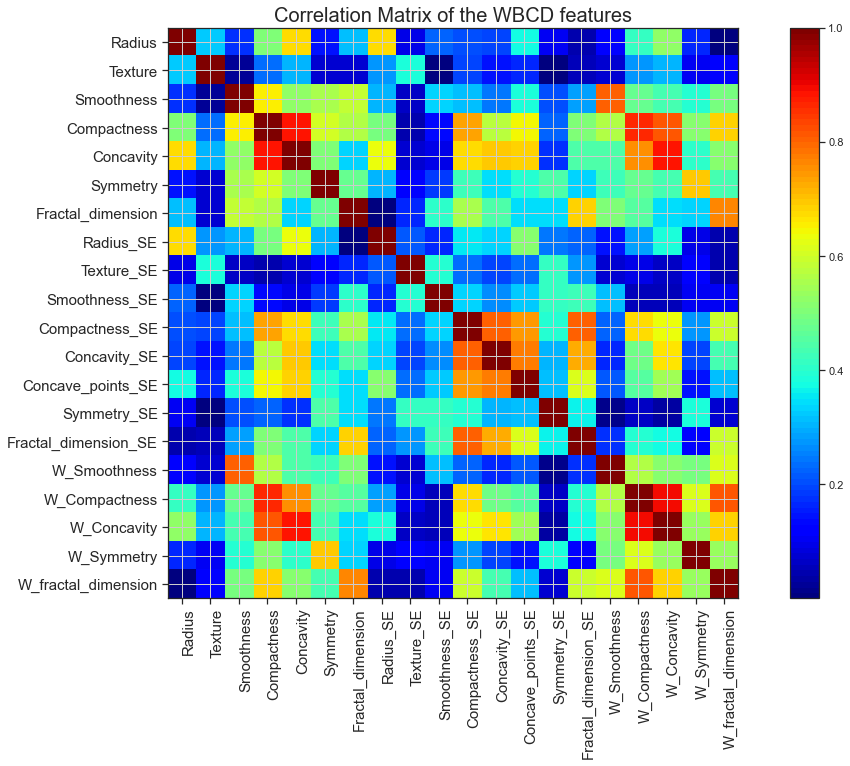

In [16]:
# Drop the redundant features from the df
df_features_corr_dropped = df_features.drop(df_features[to_drop], axis=1)

# Re-plot the dropped df containing only not-redundant features
# Using the feature_correlation_matrix() function
features_correlation_matrix(df_features_corr_dropped)

In [17]:
# Print a table with all the features correlations
# Redundant features were dropped from the original 30 features dataset
# To get the correlation, we apply the .corr() method
# followed by the .abs() method to the df_features_corr_dropped DataFrame
df_features_corr_dropped.corr().abs()

,Radius,Texture,Smoothness,Compactness,Concavity,Symmetry,Fractal_dimension,Radius_SE,Texture_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_points_SE,Symmetry_SE,Fractal_dimension_SE,W_Smoothness,W_Compactness,W_Concavity,W_Symmetry,W_fractal_dimension
Radius,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,0.311631,0.679090,0.097317,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.119616,0.413463,0.526911,0.163953,0.007066
Texture,0.323782,1.000000,0.023389,0.236702,0.302418,0.071401,0.076437,0.275869,0.386358,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.277830,0.301025,0.105008,0.119205
Smoothness,0.170581,0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.472468,0.434926,0.394309,0.499316
Compactness,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.565541,0.865809,0.816275,0.510223,0.687382
Concavity,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.448822,0.754968,0.884103,0.409464,0.514930
Symmetry,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.473200,0.433721,0.699826,0.438413
Fractal_dimension,0.311631,0.076437,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.458798,0.346234,0.334019,0.767297
Radius_SE,0.679090,0.275869,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.141919,0.287103,0.380585,0.094543,0.049559
Texture_SE,0.097317,0.386358,0.068406,0.046205,0.076218,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,0.073658,0.092439,0.068956,0.128215,0.045655
Smoothness_SE,0.222600,0.006614,0.332375,0.135299,0.098564,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,0.314457,0.055558,0.058298,0.107342,0.101480
